In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('feature_matrix.csv')
df.head()

,customer_id,time,country,SUM(order_products.quantity),MAX(order_products.price),MEAN(order_products.price),STD(order_products.quantity),SUM(order_products.price),NUM_UNIQUE(order_products.product_id),COUNT(order_products),...,SUM(orders.MEAN(order_products.price)),MEAN(orders.STD(order_products.quantity)),MODE(orders.MONTH(order_date)),MEAN(orders.MEAN(order_products.price)),NUM_UNIQUE(orders.WEEKDAY(order_date)),STD(orders.MEAN(order_products.price)),NUM_UNIQUE(orders.MONTH(order_date)),NUM_UNIQUE(orders.YEAR(order_date)),MODE(orders.YEAR(order_date)),label
0,12363,2011-08-01,Unspecified,282,7.95,2.281250,8.781194,36.50,16,16,...,2.281250,8.781194,4,2.281250,1,0.000000,1,1,2011,True
1,12461,2011-08-01,Switzerland,282,8.50,3.207647,4.416076,109.06,34,34,...,3.207647,4.416076,7,3.207647,1,0.000000,1,1,2011,True
2,12556,2011-08-01,Spain,163,12.50,2.742154,2.518382,178.24,60,65,...,2.742154,2.518382,7,2.742154,1,0.000000,1,1,2011,False
3,12635,2011-08-01,Germany,399,18.00,2.278000,3.959088,91.12,40,40,...,2.278000,3.959088,7,2.278000,1,0.000000,1,1,2011,False
4,12649,2011-08-01,Germany,192,18.00,2.640526,7.879986,50.17,19,19,...,4.407059,2.970443,5,2.203529,2,0.553529,2,2,2010,True


In [3]:
from sklearn.model_selection import train_test_split

labels = np.array(df['label']).reshape((-1, ))
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['label']), labels)


In [5]:
X_train['label'] = y_train
X_train['label'].value_counts()

True     732
False    228
Name: label, dtype: int64

In [6]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, [True for _ in range(len(y_test))])

0.5

In [7]:
data = pd.read_excel('input/Online Retail.xlsx')
data.columns = ['order_id', 'product_id', 'desc', 'quantity', 
                 'date', 'unit_price', 'customer_id', 'country']
data.head()

,order_id,product_id,desc,quantity,date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
train, test = data[data['customer_id'].isin(X_train['customer_id'])], data[data['customer_id'].isin(X_test['customer_id'])]

In [12]:
train.shape

(101155, 8)

In [13]:
test.shape

(36014, 8)

In [16]:
df['time'] = pd.to_datetime(df['time'])

In [29]:
totals = []
targets = []
for i, info in df.iterrows():
    month_start = info['time'] - pd.Timedelta(30, 'D')
    end = info['time'] + pd.Timedelta(30, 'D')
    
    subset = data.loc[(data['customer_id'] == info['customer_id']) & (data['date'] > month_start) & (data['date'] < info['time'])].copy()
    target_subset = data.loc[(data['customer_id'] == info['customer_id']) & (data['date'] > info['time']) & (data['date'] < end)].copy()
    totals.append(subset['unit_price'].sum())
    targets.append(target_subset['unit_price'].sum())

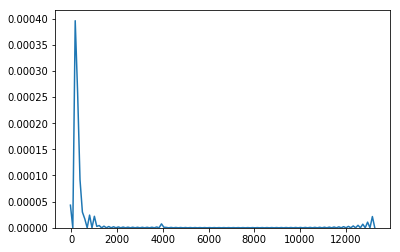

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.kdeplot(totals)

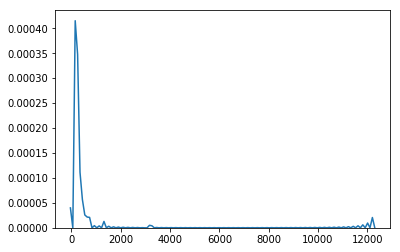

In [35]:
sns.kdeplot(targets)

In [36]:
df['total'] = totals
df['target'] = targets

In [37]:
df.head()

,customer_id,time,country,SUM(order_products.quantity),MAX(order_products.price),MEAN(order_products.price),STD(order_products.quantity),SUM(order_products.price),NUM_UNIQUE(order_products.product_id),COUNT(order_products),...,MEAN(orders.MEAN(order_products.price)),NUM_UNIQUE(orders.WEEKDAY(order_date)),STD(orders.MEAN(order_products.price)),NUM_UNIQUE(orders.MONTH(order_date)),NUM_UNIQUE(orders.YEAR(order_date)),MODE(orders.YEAR(order_date)),label,total,pred,target
0,12363,2011-08-01,Unspecified,282,7.95,2.281250,8.781194,36.50,16,16,...,2.281250,1,0.000000,1,1,2011,True,0.00,False,16.67
1,12461,2011-08-01,Switzerland,282,8.50,3.207647,4.416076,109.06,34,34,...,3.207647,1,0.000000,1,1,2011,True,109.06,True,0.00
2,12556,2011-08-01,Spain,163,12.50,2.742154,2.518382,178.24,60,65,...,2.742154,1,0.000000,1,1,2011,False,180.74,True,0.00
3,12635,2011-08-01,Germany,399,18.00,2.278000,3.959088,91.12,40,40,...,2.278000,1,0.000000,1,1,2011,False,91.12,True,0.00
4,12649,2011-08-01,Germany,192,18.00,2.640526,7.879986,50.17,19,19,...,2.203529,2,0.553529,2,2,2010,True,0.00,False,36.74


In [22]:
df['pred'] = df['total'] > 50

In [23]:
np.mean(df['pred'] == df['label'])

0.375487900078064

In [38]:
np.median(abs(df['total'] - df['target']))

35.79

In [40]:
features = df.drop(columns = ['label', 'total', 'pred', 'target'])
guess = df[['label', 'total', 'pred', 'target']]

X_train, X_test, y_train, y_test = train_test_split(features, guess)

In [41]:
from sklearn.ensemble import ExtraTreesRegressor

In [42]:
model = ExtraTreesRegressor()

model.fit(pd.get_dummies(X_train), y_train['target'])

TypeError: float() argument must be a string or a number, not 'Timestamp'